<a href="https://colab.research.google.com/github/zoospark/pub_dfc605/blob/master/dfc605_final_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'query': {'select': '1', 'item': [{'rank': '1', 'region_keyword': '홍대', 'region_type': 'favor', 'region_info': {'name': '홍익대학교 서울캠퍼스', 'fkey': '2880', 'x': '1269255395', 'y': '375512241', 'spot_id':  정보출력 끝.
request_url: https://store.naver.com/sogum/api/businesses?start=1&display=200&query=홍대+고기집&sortingOrder=precision
request_url: https://store.naver.com/sogum/api/businesses?start=101&display=300&query=홍대+고기집&sortingOrder=precision
request_url: https://store.naver.com/sogum/api/businesses?start=201&display=400&query=홍대+고기집&sortingOrder=precision
request_url: https://store.naver.com/sogum/api/businesses?start=251&display=450&query=홍대+고기집&sortingOrder=precision
Crawl 0 % complete..
Crawl 1 % complete..
Crawl 3 % complete..
Crawl 4 % complete..
Crawl 6 % complete..
Crawl 8 % complete..
Crawl 9 % complete..
Crawl 11 % complete..
Crawl 13 % complete..
Crawl 14 % complete..
Crawl 16 % complete..
Crawl 18 % complete..
Crawl 19 % complete..
Crawl 21 % complete..
Crawl 22 % complete..
Crawl 

[('맛있어요/Adjective', 0.6137200617735878),
 ('맛있었습니다/Adjective', 0.5423028355038193),
 ('좋아요/Adjective', 0.41625785264236437),
 ('여전히/Adjective', 0.23963959083788666),
 ('좋을거/Adjective', 0.23414593666289157),
 ('있으면/Adjective', 0.2188021371163226),
 ('신선한고/Adjective', 0.2092813671153808),
 ('부드럽고/Adjective', 0.20452217515616833),
 ('더웠습니다/Adjective', 0.20096688327830556),
 ('맛있었는데/Adjective', 0.18779733775268487)]

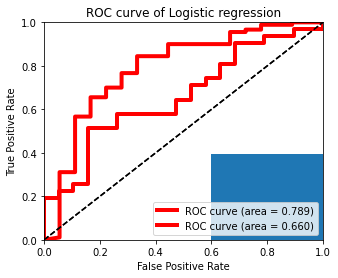

In [17]:
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import requests
import json


# 네이버 플레이스 API를 호출하기 위한 기본 주소
source_url = "https://store.naver.com/sogum/api/businesses?"

# 검색 규칙 파라미터를 추가
url_parameter_start = "start=1" 
url_parameter_display = "&display=" # start와 display는 검색결과를 얼만큼 보여줄지에 관련된 파라미터
url_parameter_query = "&query=홍대+고기집" # 검색하고 싶은 장소나 음식점에 대한 검색어
url_parameter_sorting = "&sortingOrder=precision" # 어떤 방식으로 검색 결과를 정렬할지에 대한 파라미터
url_concat = source_url + url_parameter_start +             url_parameter_display + str(200) + url_parameter_query + url_parameter_sorting

# 반환받은 API 데이터에 json.loads 함수를 사용
json_data = requests.get(url_concat).text # requests.get 함수는 json 형태의 검색 결과 데이터를 얻을 수 있음
restaurant_list_data = json.loads(json_data) #json.loads 함수는 파이썬의 딕셔너리 형태로 사용가능

# 관련도순 상위 100개의 고기집 리스트 정보를 출력.
print(str(restaurant_list_data)[:200]+" 정보출력 끝.")


restaurant_id_list = []

# 100개씩의 API 호출 결과를 3번, 마지막에 50번을 한번 더, 총 4번 가져옴. 크롤링 260회가 넘어가면 오류가 발생(이유모름)
for start_idx in [1, 101, 201, 251]:
    
    # 네이버 플레이스 API를 호출하기 위한 기본 주소.
    source_url = "https://store.naver.com/sogum/api/businesses?"
    
    # 검색 규칙 파라미터를 추가.
    url_parameter_start = "start=" + str(start_idx)
    url_parameter_display = "&display="
    url_parameter_query = "&query=홍대+고기집"
    url_parameter_sorting = "&sortingOrder=precision"
    url_concat = source_url + url_parameter_start +                 url_parameter_display + str(start_idx+199) + url_parameter_query + url_parameter_sorting
    print("request_url:", url_concat)
    json_data = requests.get(url_concat).text
    restaurant_list_data = json.loads(json_data)

    # 크롤링에 필요한 각 리뷰 상세 페이지의 id를 추출.
    for restaurant in restaurant_list_data['items']:
        if 'moreBookingReviewsPath' in restaurant:
            restaurant_id_list.append(restaurant['id'])

restaurant_id_list = list(set(restaurant_id_list))


import requests
from bs4 import BeautifulSoup
import re

columns = ['score', 'review']
df = pd.DataFrame(columns=columns)

# 네이버 리뷰 상세 페이지의 기본 주소.
source_url_head = "https://store.naver.com/restaurants/detail?id="
source_url_tail = "&tab=bookingReview#_tab"

for idx in range(0, len(restaurant_id_list)):
    print("Crawl", str(int(idx/len(restaurant_id_list)*100)), "% complete..")
    
    # 앞서 추출한 리뷰 상세 페이지의 id를 기본 주소의 파라미터로 추가
    req = requests.get(source_url_head + str(restaurant_id_list[idx]) + source_url_tail)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    review_area = soup.find(name="div", attrs={"class":"review_area"})

    # 리뷰가 없는 페이지는 아무 작업도 수행하지 않음
    if review_area is None:
        continue

    # 개발자 도구로 살펴본 html 구조에서 리뷰의 점수, 텍스트 부분을 추출
    review_list = review_area.find_all(name="div", attrs={"class":"info_area"})
    for review in review_list:
        score = review.find(name="span", attrs={"class":"score"}).text
        review_txt = review.find(name="div", attrs={"class":"review_txt"}).text

        # 추출한 리뷰의 점수, 리뷰 텍스트를 데이터프레임으로 병합
        row = [score, review_txt]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print("Crawl 100 %", "complete")


# 4점 이상의 리뷰는 긍정 리뷰, 3점 이하의 리뷰는 부정 리뷰로 평가
df['y'] = df['score'].apply(lambda x: 1 if float(x) > 4 else 0)
print(df.shape)
df.head()

df.to_csv("review_data.csv", index=False)
df = pd.read_csv("review_data.csv")



#한글로 전처리하기

import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출.
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

# 함수를 적용하여 리뷰에서 한글만 추출.
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']
df.head()


#형태소 단위로 추출 // KoNLPy 패키지 설치해야함 / https://ellun.tistory.com/46 에서참고했음
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트.
result = get_pos(df['ko_text'][0])
print(result)



#분류모델의 학습 데이터로 변환

from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())



X.shape #0000개의 피처를 가진 000개의 학습 데이터셋이 생성되었음


print(str(index_vectorizer.vocabulary_)[:100]+"..")


print(df['ko_text'][0])
print(X[0])



from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)



print(X.shape)
print(X[0])


#긍정/부정 리뷰 분류 모델링 데이터셋 분리
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)


#분류 모델링 : 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀모델을 학습.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 로지스틱 회귀모델의 성능을 평가.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))


from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)



from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")


#위의 분류모델은 모든 데이터를 1로 예측, 모델이 하나의 결과만을 예측하도록 
#잘못학습하여 클래스의 불균형 문제가 발생. 
#적절한 샘플링 방법을 통해 클래스의 불균형 문제를 해결



#분류 모델 개선
# y가 0과 1을 각각 얼마나 가지고 있는지를 출력
df['y'].value_counts()



# 1:1 비율로 랜덤 샘플링을 수행
positive_random_idx = df[df['y']==1].sample(50, random_state=50).index.tolist()
negative_random_idx = df[df['y']==0].sample(50, random_state=50).index.tolist()



# 랜덤 데이터로 데이터셋을 나눕니다.
random_idx = positive_random_idx + negative_random_idx
sample_X = X[random_idx, :]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size=0.50)
print(x_train.shape)
print(x_test.shape)


#Logistic Regression 다시 학습

# 로지스틱 회귀모델을 다시 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 학습한 모델을 테스트 데이터로 평가.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))



# Confusion matrix를 출력.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


# AUC를 계산.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")


#중요 키워드 분석
#회귀 모델의 피처 영향력 추출

# 학습한 회귀 모델의 계수를 출력.
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])


print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])



#중요 피처의 형태소


# 회귀 모델의 계수를 높은 순으로 정렬. 
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)


# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력.
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로, 피처에 형태소를 맵핑한 결과를 출력. 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있습니다.
print(str(invert_index_vectorizer)[:100]+'..')


# 상위 20개 긍정 형태소를 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])


# 상위 20개 부정 형태소를 출력
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])


noun_list = []
adjective_list = []

# 명사, 형용사별로 계수가 높은 상위 10개의 형태소를 추출. 리뷰에 긍정적인 영향을 주는 명사와 형용사 순위별
for coef in coef_pos_index[:100]:
    pos_category = invert_index_vectorizer[coef[1]].split("/")[1]
    if pos_category == "Noun":
        noun_list.append((invert_index_vectorizer[coef[1]], coef[0]))
    elif pos_category == "Adjective":
        adjective_list.append((invert_index_vectorizer[coef[1]], coef[0]))



# 상위 10개의 명사를 출력
noun_list[:10]



# 상위 10개의 형용사를 출력
adjective_list[:10]


